In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

col_names= ["symboling", 
            "normalized-losses", 
            "make", 
            "fuel-type", 
            "aspiration", 
            "num-of-doors",           
            "body-style",
            "drive-wheels",
            "engine-location",
            "wheel-base",
            "length",
            "width",
            "height",
            "curb-weight",
            "engine-type",
            'num-of-cylinders',
            'engine-size',
            'fuel-system',
            'bore',
            'stroke',
            'compression-ratio',
            'horsepower',
            'peak-rpm',
            'city-mpg',
            'highway-mpg',
            'price']


cars = pd.read_csv("imports-85.data",header=None, names=col_names)

Attribute Information:

Attribute: Attribute Range 

1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: 
alfa-romero, audi, bmw, chevrolet, dodge, honda, 
isuzu, jaguar, mazda, mercedes-benz, mercury, 
mitsubishi, nissan, peugot, plymouth, porsche, 
renault, saab, subaru, toyota, volkswagen, volvo 

4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.

continuous variables:
2,10,11,12,13,14,17,19,20,21,22,23,24,25,26

In [2]:
#replace ? with np.NaN
cars= cars.replace("?", np.NaN)
print(cars.isnull().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [3]:
print(cars.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [4]:
# convert object columns that should be numeric to numerics
cars[["normalized-losses", "bore", "stroke", "horsepower", 
     "peak-rpm", "price"]] = cars[["normalized-losses", "bore", "stroke", "horsepower", 
     "peak-rpm", "price"]].astype(float)

print(cars.dtypes)

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


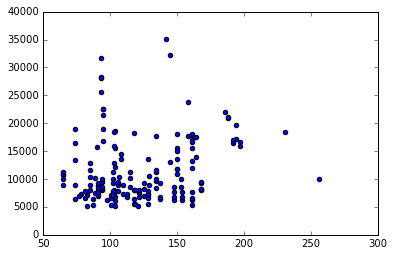

In [5]:
% matplotlib inline
cars=cars.dropna(how="all")
plt.scatter(x=cars["normalized-losses"],y=cars["price"])
plt.show()

The normalized-losses column may be important in the analysis. Replacing the missing values with averages may not be the most optimal solution. Instead the missing rows will be dropped leaving a sufficient number of datapoints for the analysis.

In [6]:
#dropping any row with missing values
cars = cars.dropna(how="any")
price = cars["price"]
#normalizing the numeric columns and creating a dataframe with just numeric columns
df = cars[["symboling", "normalized-losses", "wheel-base", "length", "width", "height", "curb-weight",
"engine-size", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg",
"highway-mpg"]]

cars = (df - df.mean()) / (df.max() - df.min())
cars["price"] = price

In [7]:
cars = cars.reset_index(drop = True)

In [8]:
# def knn_train_test(train_col, target_col, df):
int(cars.shape[0]*(2/3))

106

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


def knn_train_test(train_col, test_col, df, k):
    
    #randomize the order:
    randomized_order = np.random.permutation(len(df))
    df = df.loc[randomized_order].copy()
    
    #Create test and train dataframes:
    train = df.iloc[0:(int(cars.shape[0]*(2/3))),:]
    test = df.iloc[(int(cars.shape[0]*(2/3))):,:]
    
    #Machine learning
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train[[train_col]], train[test_col])
    
    predictions = knn.predict(test[[train_col]])
    rmse = np.sqrt(mean_squared_error(test[test_col], predictions))
    return rmse

In [10]:
knn_train_test("normalized-losses","price",cars, 10)

5583.250906666514

For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9). Visualize the results using a scatter plot or a line plot.

In [11]:
num=['symboling',
'normalized-losses',
'wheel-base',
'length',
'width',
'height',
'curb-weight',
'engine-size',
'bore',
'stroke',
'compression-ratio',
'horsepower',
'peak-rpm',
'city-mpg',
'highway-mpg']

In [12]:
def knn_train_test2(train_col, test_col, df):
    np.random.seed(2)
    #randomize the order:
    randomized_order = np.random.permutation(len(df))
    df = df.loc[randomized_order].copy()
    
    #Create test and train dataframes:
    train = df.iloc[0:(int(cars.shape[0]*(2/3))),:]
    test = df.iloc[(int(cars.shape[0]*(2/3))):,:]    
    
    k_vals = [1,3,5,7,9]
    
    result = list()
    
    for k in k_vals:
    
        #Machine learning
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train[[train_col]], train[test_col])

        predictions = knn.predict(test[[train_col]])
        rmse = np.sqrt(mean_squared_error(test[test_col], predictions))

        result.append(rmse)
    
    return result

In [13]:
k_vals = [1,3,5,7,9]
cols = num
dic={}
k_v = list()
col = list()

for col in cols:
    result = knn_train_test2(col, "price", cars)
    dic[col] = result

dic  

{'bore': [5002.673673826072,
  3265.71771224958,
  3319.7910071751135,
  3826.5226462399432,
  4028.6869202245016],
 'city-mpg': [3995.628590120543,
  3299.1346886600945,
  3867.187080290048,
  4130.501845160754,
  3959.2451745504795],
 'compression-ratio': [4674.54448391236,
  4958.493366266851,
  5221.427526919044,
  5504.896885961388,
  5752.74166466541],
 'curb-weight': [2845.684422101066,
  2885.962976527383,
  2800.146205077749,
  2822.907895030848,
  2982.6257395712028],
 'engine-size': [3658.885986250099,
  2919.3529606053785,
  3467.1975437732367,
  3632.769816895793,
  3488.1536723166],
 'height': [5360.075046996447,
  6363.060737380172,
  5456.818860976552,
  5540.39139044686,
  5699.130569651986],
 'highway-mpg': [4884.630506873498,
  3717.791238332769,
  3646.6179253638443,
  3582.8227376936065,
  3665.0632304702435],
 'horsepower': [3260.7024159347966,
  2862.183812423764,
  3368.644767530605,
  3802.0616621698623,
  4119.297945262623],
 'length': [3603.4033598231695,
  3

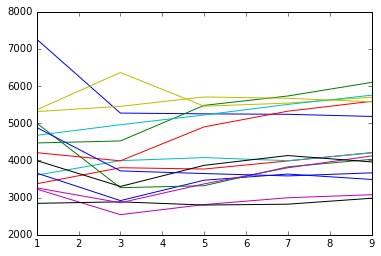

In [14]:
for n in num:
    y = dic[n]
    x = [1,3,5,7,9]
    plt.plot(x,y)

5 folds are sufficient for data optimization

In [15]:
def knn_train_test3(train_cols, test_col, df):
    """This function can take a list of columns"""
    #randomize the order:
    randomized_order = np.random.permutation(len(df))
    df = df.loc[randomized_order].copy()
    
    #Create test and train dataframes:
    train = df.iloc[0:(int(cars.shape[0]*(2/3))),:]
    test = df.iloc[(int(cars.shape[0]*(2/3))):,:]    
    
   
    #Machine learning
    knn = KNeighborsRegressor()
    knn.fit(train[train_cols], train[test_col])

    predictions = knn.predict(test[train_cols])
    rmse = np.sqrt(mean_squared_error(test[test_col], predictions))

    
    
    return rmse

In [16]:
# Sorting for lowest RMSE

placeholder = {}

for key, value in dic.items():
    placeholder[key] = np.min(value)
    
sorted(placeholder, key=placeholder.__getitem__)

['width',
 'curb-weight',
 'horsepower',
 'engine-size',
 'bore',
 'city-mpg',
 'wheel-base',
 'highway-mpg',
 'length',
 'stroke',
 'normalized-losses',
 'compression-ratio',
 'symboling',
 'peak-rpm',
 'height']

In [17]:
cols2 = ['width', 'curb-weight']
cols3 = ['width', 'curb-weight','horsepower']
cols4 = ['width', 'curb-weight','horsepower','engine-size']
cols5 = ['width', 'curb-weight','horsepower','engine-size','bore']

result2 = knn_train_test3(cols2, "price", cars)
result3 = knn_train_test3(cols3, "price", cars)
result4 = knn_train_test3(cols4, "price", cars)
result5 = knn_train_test3(cols5, "price", cars)

print("RMSE for:")
print("2 best features: " + str(result2))
print("3 best features: " + str(result3))
print("4 best features: " + str(result4))
print("5 best features: " + str(result5))

RMSE for:
2 best features: 1732.7177389923809
3 best features: 2775.974847229857
4 best features: 3176.6381289445217
5 best features: 2576.5306120279224


Best RMSE is obtained by using the two best features.

## Vary the hyperparameter value k for the top 3 models

In [21]:
def knn_train_test4(train_cols, test_col, df):
    np.random.seed(1)
    #randomize the order:
    randomized_order = np.random.permutation(len(df))
    df = df.loc[randomized_order].copy()
    
    #Create test and train dataframes:
    train = df.iloc[0:(int(cars.shape[0]*(2/3))),:]
    test = df.iloc[(int(cars.shape[0]*(2/3))):,:]    
    
    k_vals = list(range(26)[1:])
    
    result = list()
    
    for k in k_vals:
    
        #Machine learning
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train[train_cols], train[test_col])

        predictions = knn.predict(test[train_cols])
        rmse = np.sqrt(mean_squared_error(test[test_col], predictions))

        result.append(rmse)
    
    return result

In [22]:
col2_rank = knn_train_test4(cols2, "price", cars)
col5_rank = knn_train_test4(cols5, "price", cars)
col4_rank = knn_train_test4(cols4, "price", cars)

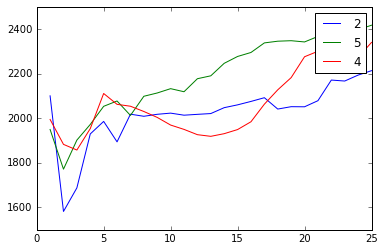

In [23]:
y2 = col2_rank
y5 = col5_rank
y4 = col4_rank
x = list(range(26)[1:])
plt.plot(x,y2)
plt.plot(x,y5)
plt.plot(x,y4)
plt.legend([2,5,4])
plt.show()

For the best RMSE use 2 best features at k = 2

# modifiy to do k-fold cross validation